<a href="https://colab.research.google.com/github/arshiaar/fractals/blob/main/Fractals_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.0.1+cu118


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [ ]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

In [ ]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [ ]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)



# change gaussian function to 2d sine function
z = torch.sin(torch.sqrt(x**2+y**2))

# multiply both together

z = torch.exp(-(x**2+y**2)/2.0) * torch.sin(torch.sqrt(x**2+y**2))

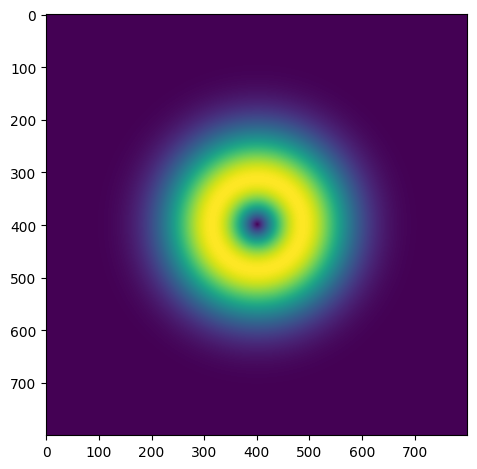

In [ ]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

In [ ]:
# PART B of PRAC - Mandelbort Set Fractal

In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1:1:0.1, -3:0:0.1]

In [ ]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

In [ ]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [ ]:
#Mandelbrot Set
for i in range(200):
#Compute the new values of z: z^2 + x
#
  zs_ = zs*zs + z
#Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
#Update variables to compute
  ns += not_diverged
  zs = zs_

<ipython-input-63-17b31760885b>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


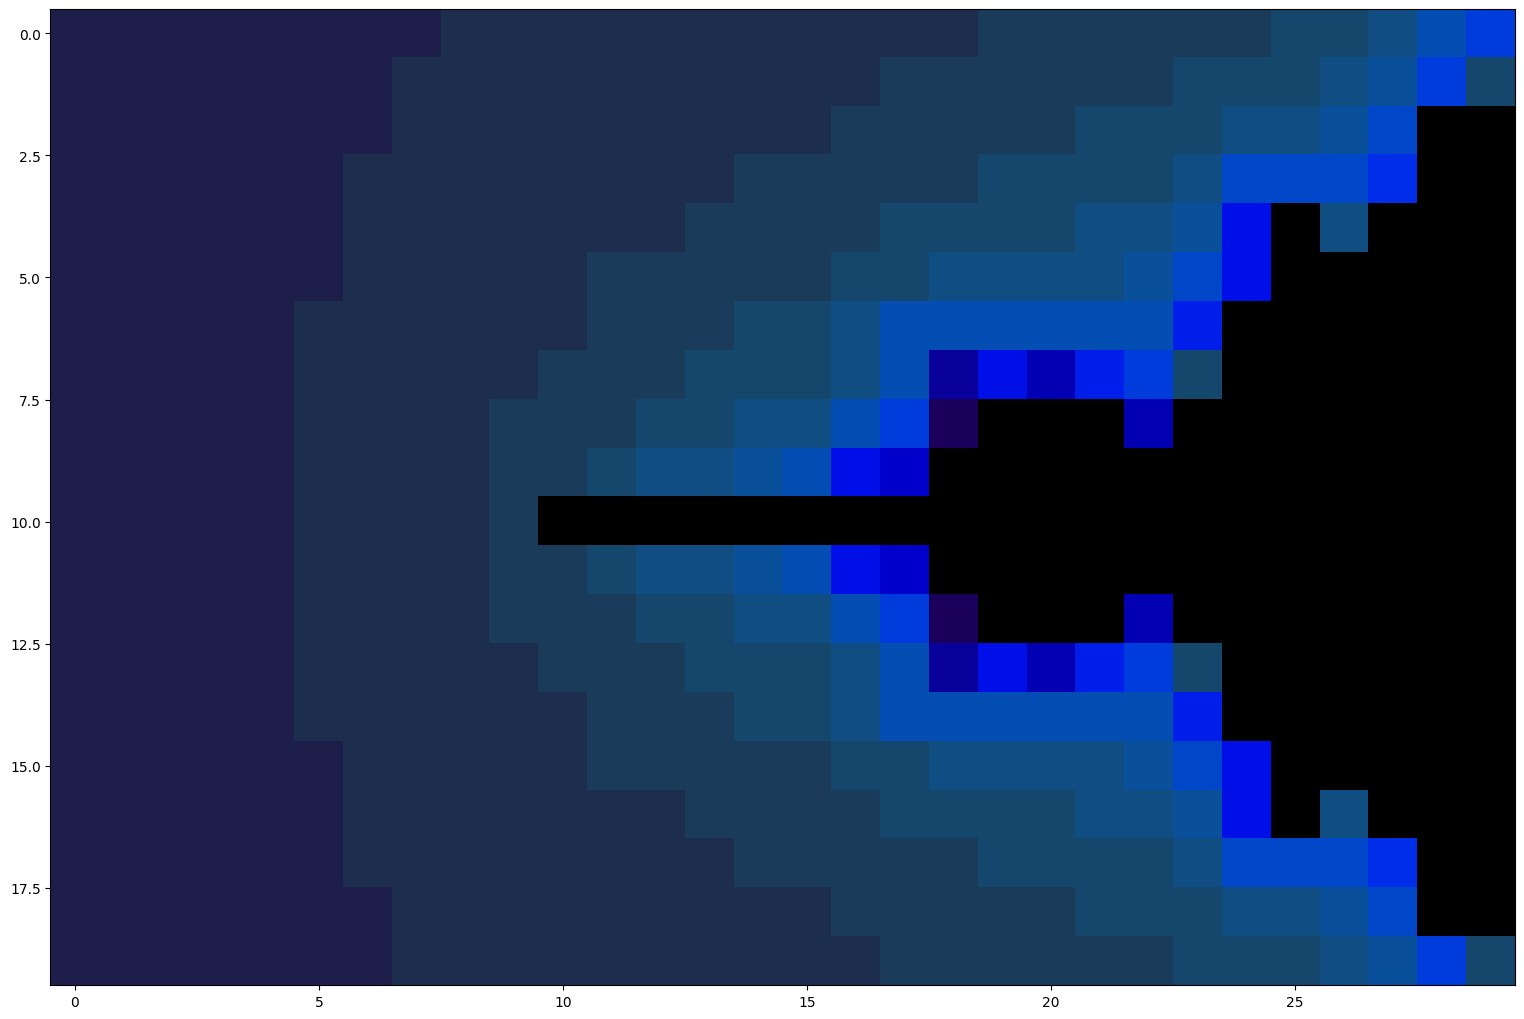

In [ ]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
    colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# modification - decrease spacing
# zoom into another part of the set and compute that

# zoomed -into the tail.


In [66]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

In [67]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

In [68]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [71]:
# generate julia set instead here.


#Mandelbrot Set
for i in range(200):
#Compute the new values of z: z^2
  zs_ = zs*zs
#Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
#Update variables to compute
  ns += not_diverged
  zs = zs_

<ipython-input-72-17b31760885b>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


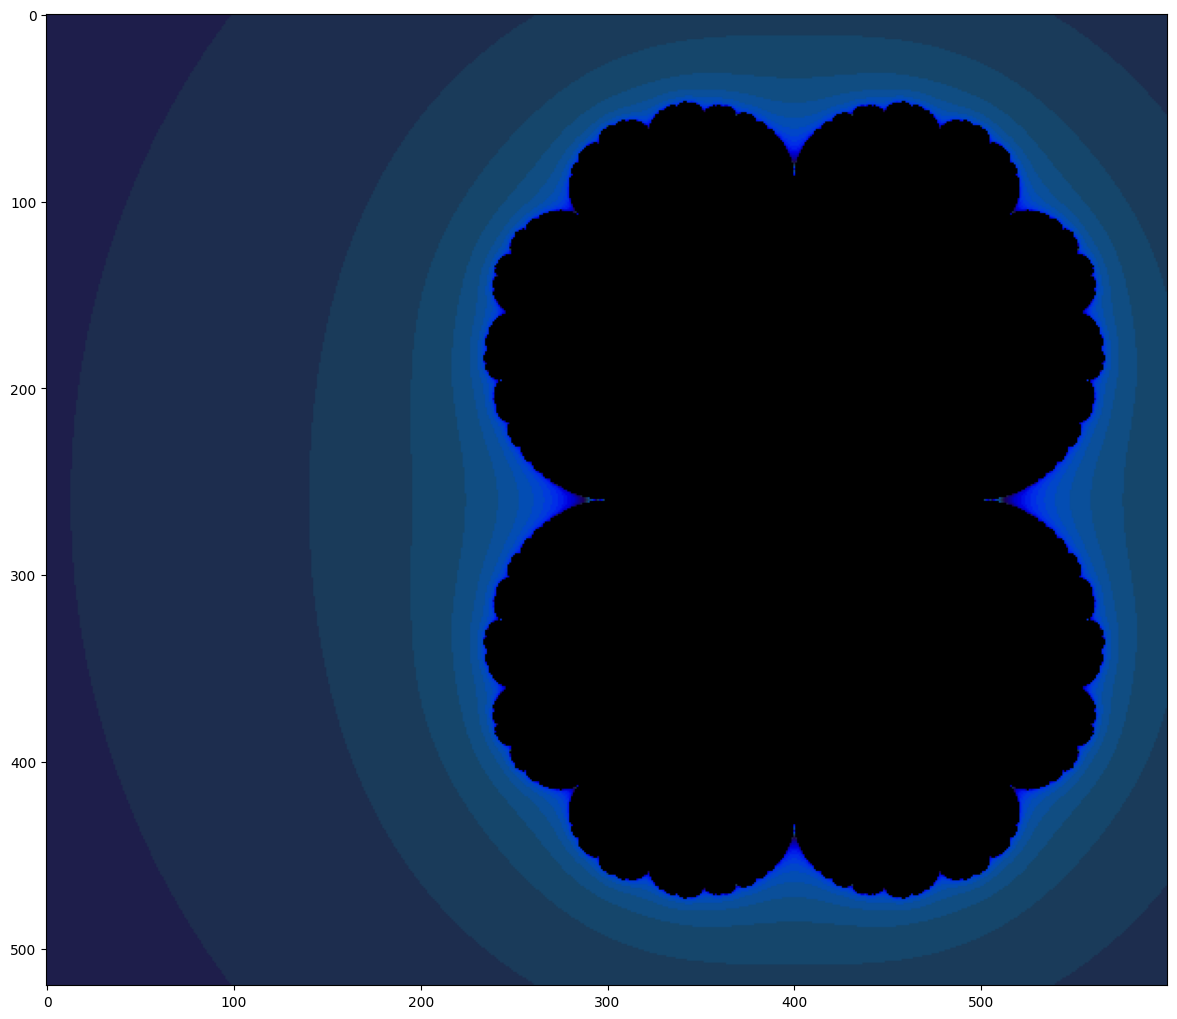

In [72]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
    colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

In [104]:
# Custom Fractal

Y, X = np.mgrid[-1.3:1.3:0.005, -2:0:0.005]
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)


# generate fractal set.
for i in range(1000):
#Compute the new values of z: z^2 + x
  p = zs*zs*zs - 2*zs + 2
  dp = 3*zs*zs - 2
  zs_ = zs - 1*(p/dp)
#Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
#Update variables to compute
  ns += not_diverged
  zs = zs_




<ipython-input-105-17b31760885b>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


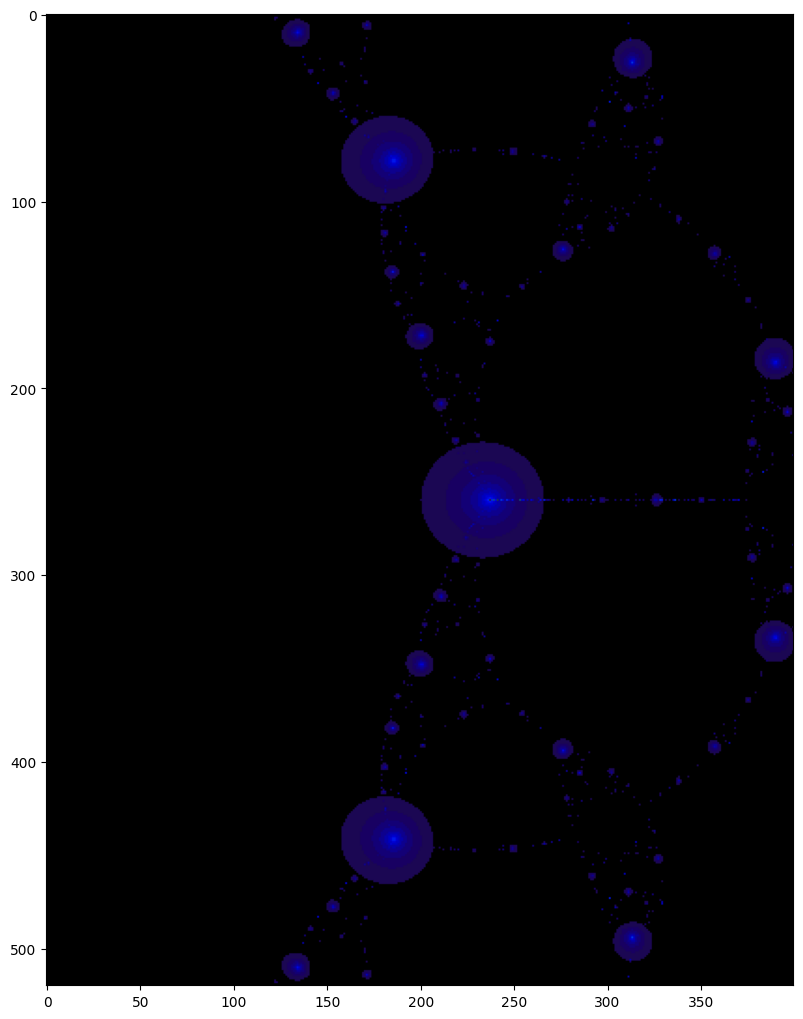

In [105]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
    colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()